# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

2025-11-01 01:48:45.829571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761958125.846815   23310 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761958125.851721   23310 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761958125.865514   23310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761958125.865537   23310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761958125.865539   23310 computation_placer.cc:177] computation placer alr

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

I0000 00:00:1761958128.761819   23310 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1292 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.633824, W: 0.529370, b: -1.170213
step: 100, loss: 0.530259, W: 0.497587, b: -0.944887
step: 150, loss: 0.449041, W: 0.469441, b: -0.745347
step: 200, loss: 0.385347, W: 0.444516, b: -0.568641
step: 250, loss: 0.335397, W: 0.422444, b: -0.412156
step: 300, loss: 0.296225, W: 0.402897, b: -0.273579
step: 350, loss: 0.265506, W: 0.385587, b: -0.150860
step: 400, loss: 0.241415, W: 0.370258, b: -0.042185
step: 450, loss: 0.222522, W: 0.356684, b: 0.054054
step: 500, loss: 0.207706, W: 0.344662, b: 0.139280
step: 550, loss: 0.196087, W: 0.334017, b: 0.214753
step: 600, loss: 0.186975, W: 0.324589, b: 0.281589
step: 650, loss: 0.179829, W: 0.316241, b: 0.340777
step: 700, loss: 0.174225, W: 0.308847, b: 0.393191
step: 750, loss: 0.169830, W: 0.302300, b: 0.439607
step: 800, loss: 0.166384, W: 0.296502, b: 0.480712
step: 850, loss: 0.163681, W: 0.291368, b: 0.517113
step: 900, loss: 0.161561, W: 0.286821, b: 0.549348
step: 950, loss: 0.159899, W: 0.282794, b: 0.577894
step:

In [8]:
import matplotlib.pyplot as plt

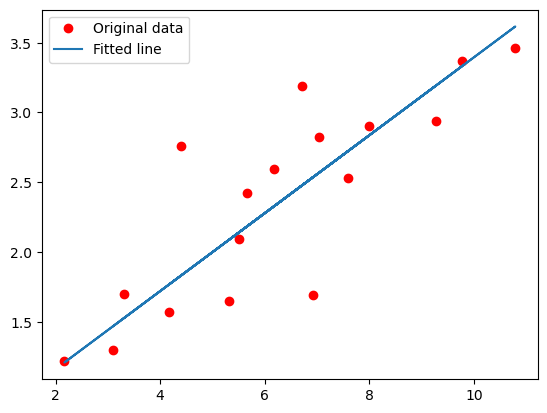

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()